In [1]:
%load_ext autoreload
%autoreload 2

----------perfect----------


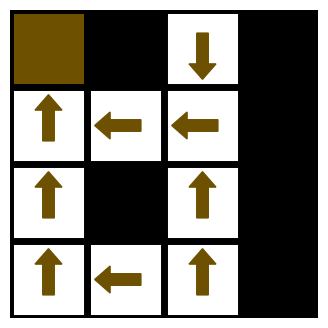

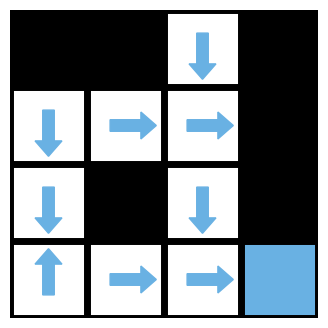

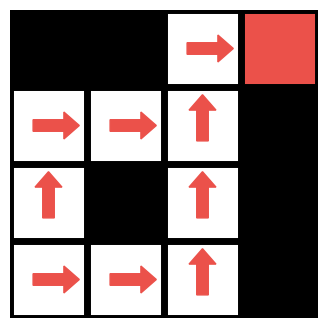

----------preplay----------


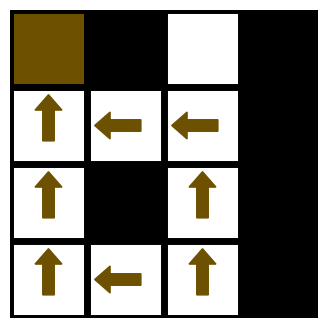

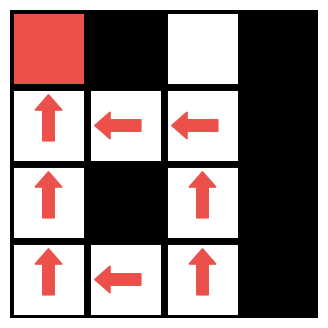

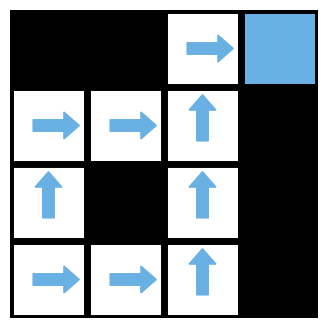

----------sucessor features----------


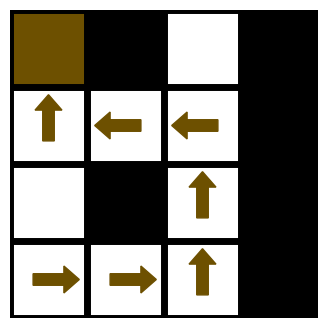

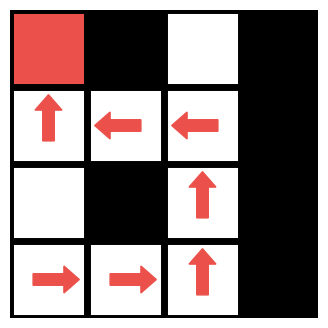

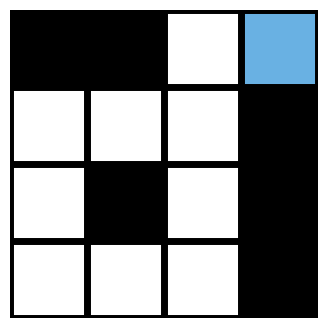

----------Dyna----------


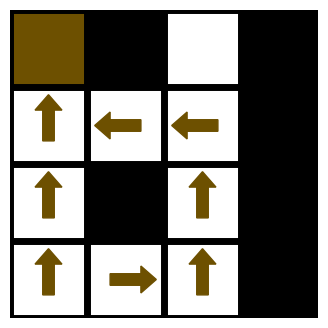

----------Q-learning----------


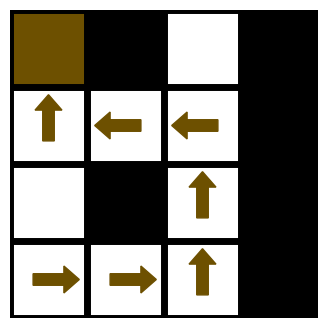

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_arrow_matrix(matrix, color='blue', border=5):
    if not isinstance(matrix, list):
        raise ValueError("Matrix must be a list of strings")
    
    height = len(matrix)
    width = len(matrix[0])
    
    fig, ax = plt.subplots(figsize=(width, height))
    
    for i in range(height):
        for j in range(width):
            char = matrix[i][j]
            if char == '.':
                continue
            elif char == 'b':
                ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, facecolor='black'))
            elif char == 'c':
                ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, facecolor=color))
            elif char == '>':
                ax.arrow(j-0.2, i, 0.4, 0, head_width=0.35, head_length=0.2, fc=color, ec=color, width=0.15)
            elif char == '<':
                ax.arrow(j+0.2, i, -0.4, 0, head_width=0.35, head_length=0.2, fc=color, ec=color, width=0.15)
            elif char == '^':
                ax.arrow(j, i+0.2, 0, -0.4, head_width=0.35, head_length=0.2, fc=color, ec=color, width=0.15)
            elif char == 'v':
                ax.arrow(j, i-0.2, 0, 0.4, head_width=0.35, head_length=0.2, fc=color, ec=color, width=0.15)
    
    ax.set_xlim(-0.5, width-0.5)
    ax.set_ylim(height-0.5, -0.5)
    # Draw cell borders
    for i in range(height+1):
        ax.axhline(y=i-0.5, color='black', linewidth=border)
    for j in range(width+1):
        ax.axvline(x=j-0.5, color='black', linewidth=border)
        
    ax.set_aspect('equal')
    plt.axis('off')
    return fig

# Example usage:
matrix = [
"cb.b",
"...b",
".b.b",
"...b",
]

# groceries - successor features
COFFEE = "#6D5000"
FOOD = '#EB514A'
GROCERIES = '#69B1E3'
#######################
# Perfect
#######################
print("-"*10 + "perfect" + "-"*10)
matrix = [
"cbvb",
"^<<b",
"^b^b",
"^<^b",
]
fig = plot_arrow_matrix(matrix, COFFEE)
plt.show()
matrix = [
"bbvb",
"v>>b",
"vbvb",
"^>>c",
]
fig = plot_arrow_matrix(matrix, GROCERIES)
plt.show()
matrix = [
"bb>c",
">>^b",
"^b^b",
">>^b",
]
fig = plot_arrow_matrix(matrix, FOOD)
plt.show()


#######################
# Preplay
#######################
print("-"*10 + "preplay" + "-"*10)
matrix = [
"cb.b",
"^<<b",
"^b^b",
"^<^b",
]
fig = plot_arrow_matrix(matrix, COFFEE)
plt.show()
matrix = [
"cb.b",
"^<<b",
"^b^b",
"^<^b",
]
fig = plot_arrow_matrix(matrix, FOOD)
plt.show()
matrix = [
"bb>c",
">>^b",
"^b^b",
">>^b",
]
fig = plot_arrow_matrix(matrix, GROCERIES)
plt.show()


#######################
# Successor features
#######################
print("-"*10 + "sucessor features" + "-"*10)
matrix = [
"cb.b",
"^<<b",
".b^b",
">>^b",
]
fig = plot_arrow_matrix(matrix, COFFEE)
plt.show()
matrix = [
"cb.b",
"^<<b",
".b^b",
">>^b",
]
fig = plot_arrow_matrix(matrix, FOOD)
plt.show()
matrix = [
"bb.c",
"...b",
".b.b",
"...b",
]
fig = plot_arrow_matrix(matrix, GROCERIES)
plt.show()


#######################
# Dyna
#######################
print("-"*10 + "Dyna" + "-"*10)
matrix = [
"cb.b",
"^<<b",
"^b^b",
"^>^b",
]
fig = plot_arrow_matrix(matrix, COFFEE)
plt.show()

#######################
# Q-learning
#######################
print("-"*10 + "Q-learning" + "-"*10)
matrix = [
"cb.b",
"^<<b",
".b^b",
">>^b",
]
fig = plot_arrow_matrix(matrix, COFFEE)
plt.show()

In [ ]:
# Example usage:
# coffee
matrix = [
"c.b",
"^<.",
"b^b",
]
fig = plot_arrow_matrix(matrix, '#FCD487')
plt.show()
# food
matrix = [
"c.b",
"^<.",
"b^b",
]
fig = plot_arrow_matrix(matrix, '#EB514A')
plt.show()

#groceries
matrix = [
"b.c",
">>^",
"b^b",
]
fig = plot_arrow_matrix(matrix, '#69B1E3')
plt.show()

#groceries - successor features
matrix = [
"b.c",
"...",
"b.b",
]
fig = plot_arrow_matrix(matrix, '#69B1E3')
plt.show()

# matrix = [
# "b.b",
# ">vv",
# "b>c",
# ]
# fig = plot_arrow_matrix(matrix, '#75EA3B')
# plt.show()
# matrix = [
# ">cb.",
# "^^b.",
# "^^..",
# "^^b.",
# ]
# fig = plot_arrow_matrix(matrix, 'red')
# plt.show()

# matrix = [
# ">>b.",
# ">vbc",
# ">>>^",
# "^^b.",
# ]
# fig = plot_arrow_matrix(matrix, '#75EA3B')
# plt.show()

In [24]:
p = np.asarray([0,0,0,0]) + 1e-6
x = p/p.sum()
x


array([0.25, 0.25, 0.25, 0.25])

In [1]:
import numpy as np
import jax.numpy as jnp
from typing import Union

def sample_from_remaining(
    key: str,
    possible_values: list,
    min_samples: Union[list, int],
    storage: dict = None
) -> tuple:
    """Sample from remaining counts while maintaining storage state.
    
    Args:
        key: Key to identify the type of sampling (e.g. 'goal', 'start_position')
        possible_values: List of possible values to sample from
        min_samples: List of minimum required samples for each value
        storage: Dictionary to maintain state (if None, creates new one)
        
    Returns:
        tuple: (sampled value, dict of remaining counts)
    """
    if storage is None:
        storage = {}
        
    # Convert values to strings for storage
    possible_values_str = [str(i) for i in possible_values]
    
    if isinstance(min_samples, list):
        num_required = [int(i) for i in min_samples]
    elif isinstance(min_samples, (np.ndarray, jnp.ndarray)):
        if min_samples.shape == possible_values.shape:
            num_required = [int(i) for i in min_samples]
        elif min_samples.shape in ((1,), ()):
            num_required = [int(min_samples)] * len(possible_values)    
        else:
            raise RuntimeError(f"{min_samples.shape}, {min_samples.dtype}")
    else:
        num_required = [int(min_samples)] * len(possible_values)
    
    # Get or initialize remaining counts
    default = {g: n for g, n in zip(possible_values_str, num_required)}
    remaining_counts = storage.get(key, default)
    
    # Maintain order of values
    output_counts = np.array([
        remaining_counts.get(str(g), n) 
        for g, n in zip(possible_values_str, num_required)
    ], dtype=np.int32)
    
    # Sample based on remaining counts
    output_counts = output_counts + 1e-6
    probs = output_counts / (output_counts.sum())
    idx = np.random.choice(len(possible_values), p=probs)
    sampled_value = possible_values[idx]
    
    return sampled_value, remaining_counts

def sample_goal_and_position(
    possible_goals,
    success_per_goal,
    start_positions,
    min_samples_per_location: int = 2,
    num_start_locations: int = 1,
    storage: dict = None
):
    """Sample both goal and position while tracking remaining counts.
    
    Args:
        possible_goals: List of possible goal values
        success_per_goal: List of required successes per goal
        start_positions: List of possible start positions
        min_samples_per_location: Minimum samples required per location
        storage: Dictionary to maintain state (if None, creates new one)
    
    Returns:
        tuple: (goal, start_position)
    """
    if storage is None:
        storage = {}
    
    stage_idx = storage.get("stage_idx", 0)
    
    # Sample goal
    key = f"{stage_idx}_remaining_goal_success"
    goal, remaining_counts = sample_from_remaining(
        key=key,
        possible_values=possible_goals,
        min_samples=success_per_goal,
        storage=storage
    )
    storage[key] = remaining_counts
    print(f"remaining goal counts: {remaining_counts}")
    
    # Sample start position
    key = f"{stage_idx}_remaining_start_positions"
    start_position, remaining_counts = sample_from_remaining(
        key=key,
        possible_values=start_positions,
        min_samples=min_samples_per_location,
        storage=storage,
        num_dimensions
    )
    start_position_str = str(start_position)
    remaining_counts[start_position_str] = remaining_counts[start_position_str] - 1
    storage[key] = remaining_counts
    print(f"remaining start position counts: {remaining_counts}")
    
    return goal, start_position

sample_goal_and_position(
  possible_goals=jnp.asarray([0,1,2,3]),
  success_per_goal=jnp.asarray([2,2,2,2]),
  start_positions=jnp.asarray([(0,0), (1,1),(2,2), (-1, -1)]),
  min_samples_per_location=jnp.asarray(2),
)

SyntaxError: positional argument follows keyword argument (491698269.py, line 102)

In [15]:
from typing import Union
import jax.numpy as jnp
import numpy as np

def sample_from_remaining(
  key: str,
  possible_values: list,
  min_samples: Union[list, int],
) -> tuple:
  """Sample from remaining counts while maintaining storage state.

  Args:
      storage_key: Key to identify the type of sampling (e.g. 'goal', 'start_position')
      possible_values: List of possible values to sample from
      min_samples: List of minimum required samples for each value

  Returns:
      tuple: (sampled value, dict of remaining counts)
  """
  # Convert values to strings for storage
  possible_values_str = [str(i) for i in possible_values]

  if isinstance(min_samples, list):
    num_required = [int(i) for i in min_samples]
  elif isinstance(min_samples, (jnp.ndarray, np.ndarray)list):
    num_required = [int(i) for i in min_samples]
  else:
    print(min_samples, type(min_samples))
    num_required = [int(min_samples)] * len(possible_values)

  # Get or initialize remaining counts
  default = {g: n for g, n in zip(possible_values_str, num_required)}
  remaining_counts = default

  # Maintain order of values
  output_counts = jnp.array(
    [
      remaining_counts.get(str(g), n) for g, n in zip(possible_values_str, num_required)
    ],
    dtype=jnp.int32,
  )

  # Sample based on remaining counts
  probs = (output_counts + 1e-6) / (output_counts.sum())
  sampler = distrax.Categorical(probs=probs)
  rng = nicewebrl.new_rng()
  idx = sampler.sample(seed=rng)
  sampled_value = possible_values[idx]

  return sampled_value, remaining_counts


def sample_goal_and_position(
  possible_goals,
  success_per_goal,
  start_positions,
  min_samples_per_location: int = 2,
):
  try:
    stage_idx = 0
  except Exception:
    # no page setup yet
    dummy_goal = jnp.asarray(-1, dtype=jnp.int32)
    dummy_position = jnp.asarray((-1, -1), dtype=jnp.int32)
    return dummy_goal, dummy_position

  ###################
  # sample goal in proportion to remaining successes
  ####################
  stage_idx = 0
  key = f"{stage_idx}_remaining_goal_success"
  goal, remaining_counts = sample_from_remaining(
    key=key,
    possible_values=possible_goals,
    min_samples=success_per_goal,
  )
  print(f"remaining goal counts: {remaining_counts}")

  ###################
  # sample start position in proportion to how often not sampled
  ####################
  key = f"{stage_idx}_remaining_start_positions"
  start_position, remaining_counts = sample_from_remaining(
    key=key,
    possible_values=start_positions,
    min_samples=min_samples_per_location,
  )
  start_position_str = str(start_position)
  remaining_counts[start_position_str] -= 1
  print(f"remaining start position counts: {remaining_counts}")

  return goal, start_position

sample_goal_and_position(
  possible_goals=jnp.asarray([0,1,2,3]),
  success_per_goal=jnp.asarray([2,2,2,2]),
  start_positions=jnp.asarray([(0,0), (1,1),(2,2)]),
  min_samples_per_location=2,
)

[2 2 2 2] <class 'jaxlib.xla_extension.ArrayImpl'>


TypeError: Only length-1 arrays can be converted to Python scalars.

In [16]:
import craftax_experiment_structure

In [2]:
from craftax.craftax_env import make_craftax_env_from_name
import jax
import numpy as np
import jax.numpy as jnp
from functools import partial
import matplotlib.pyplot as plt
from craftax.craftax.constants import Action

from simulations.craftax_web_env import CraftaxSymbolicWebEnvNoAutoReset
from jaxneurorl.wrappers import TimestepWrapper
from craftax_fullmap_renderer import render_craftax_pixels, TEXTURES

import craftax_fullmap_constants as constants
import craftax_utils
import craftax_experiment_configs
from craftax.craftax.constants import Achievement, BlockType, BLOCK_PIXEL_SIZE_HUMAN

Loading textures from cache.
Textures successfully loaded from cache.
Loading textures from cache.
Textures successfully loaded from cache.


In [4]:
import craftax_experiment_structure

default_params
EnvParams(max_timesteps=200, day_length=100000, always_diamond=False, mob_despawn_distance=100000, max_attribute=5, god_mode=False, world_seeds=(0,), current_goal=0, start_positions=Array([[24, 24],
       [24, 24],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int32), goal_locations=((-1, -1),), placed_goals=(-1,), fractal_noise_angles=(None, None, None, None), active_goals=Array([1., 1., 1.], dtype=float32), num_success=5)
Compiling environment reset and step functions.
	reset time: 12.311649084091187
	step time: 14.410004138946533
Compiling multi-render function.
state.achievements=[False False False False False  True False False False False False False
 False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 Fal

In [7]:
key = jax.random.PRNGKey(0)
timestep = craftax_experiment_structure.jax_env.reset(
  key, craftax_experiment_structure.default_params
)

In [14]:
import nicewebrl


def reduce_timestep_size(t):
  state = t.state

  def make_uint(x):
    return x.astype(jnp.uint8)
    return x

  new_state = state.replace(
    map=jax.tree_map(lambda t: make_uint(t[:1]), state.map),
    item_map=jax.tree_map(lambda t: make_uint(t[:1]), state.item_map),
    mob_map=jax.tree_map(lambda t: make_uint(t[:1]), state.mob_map),
    light_map=jax.tree_map(lambda t: make_uint(t[:1]), state.light_map),
  )
  return t.replace(observation=None, state=new_state)


old_size = nicewebrl.get_size(timestep)
new_size = nicewebrl.get_size(reduce_timestep_size(timestep))

print(f"{new_size}/{old_size}={100 * new_size / old_size}")

10331/285323=3.6208086975112415
